0 = close/last, 1 = open, 2= high, 3 = low
objective: guess the next closing value in the next day

In [263]:
a = ['2','3']
b = a[0]
print(np.linspace(0,9,num=10))
def normalize(n):
    n = 1/(1+np.exp(-n))


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [2]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import csv
import numpy as np
import tensorflow as tf

with open(r'C:\Users\user\Documents\road to qm\machine learning\pytorch\stock market\NVDA_10.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
data = np.array(data)
num_days = data.shape[0]-1
#print(num_days)
#print(data)
#print(data.shape)days = 200
def normalize(n):
    n = 1/(1+np.exp(-n))
    return n
def stock_vector_generator(data, days):
    data = np.delete(data,0,axis = 0) #deletes the top row
    upper_range = np.random.randint(days,num_days) #gives index between days and num_days as a starting point.
    lower_range = upper_range - days
    #closing value the next day - this will be our test data
    next_day_row = data[lower_range-1]
    
   
    #slicing data into small chunks and removing unneccessary rows and columns
    stock_array = data[lower_range:upper_range,:]
    #print(stock_array)
    #print(stock_array.shape)
    #print('Date start: ' + stock_array[-1][0])
    #print('Date end: ' + stock_array[0][0])
    #print('Days: ' + str(days))
    stock_array = np.delete(stock_array, 0, axis = 1)
    stock_array = np.delete(stock_array, 1, axis = 1)
    
    #now to get rid of the dollar sign and change all into floats
    for row in range(stock_array.shape[0]):
        for element in range(stock_array.shape[1]):
            price = stock_array[row][element]
            if price[0] == '$':
                price = price[1:]
            stock_array[row][element] = price
    stock_array = np.array([list( map(float,i) ) for i in stock_array])
    #stock_array = np.array([list( map(normalize,i) ) for i in stock_array])
    #now turn into a single lined vector
    stock_vector = stock_array.reshape(days*4,1)
    return stock_vector, next_day_row

In [225]:
#initializing
stock_vector, next_day_row = stock_vector_generator(data,days)
stock_tensor = torch.from_numpy(stock_vector)
actual = torch.from_numpy(np.array([float(next_day_row[1][1:])])).float()
print(stock_tensor)
print(actual)

tensor([[0.5178],
        [0.5168],
        [0.5186],
        [0.5125],
        [0.5162],
        [0.5085],
        [0.5176],
        [0.5032],
        [0.5075],
        [0.4978],
        [0.5088],
        [0.4943],
        [0.5005],
        [0.5025],
        [0.5053],
        [0.4943],
        [0.4990],
        [0.4893],
        [0.4995],
        [0.4878],
        [0.4900],
        [0.4970],
        [0.5000],
        [0.4898],
        [0.4935],
        [0.4863],
        [0.4950],
        [0.4850],
        [0.4914],
        [0.4960],
        [0.5060],
        [0.4881],
        [0.4923],
        [0.4997],
        [0.4999],
        [0.4878],
        [0.4985],
        [0.4983],
        [0.5022],
        [0.4914]], dtype=torch.float64)
tensor([0.5154])


C:\Users\user\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


At 0 step, loss is 486.1611633300781
At 10 step, loss is 277.2825012207031
At 20 step, loss is 0.011295204050838947
At 30 step, loss is 0.008330055512487888
At 40 step, loss is 15.089966773986816
At 50 step, loss is 19.284481048583984
At 60 step, loss is 9.875341415405273
At 70 step, loss is 5.105292797088623
At 80 step, loss is 4.443354606628418
At 90 step, loss is 0.02110718935728073
At 100 step, loss is 0.0376715324819088
At 110 step, loss is 2.7726171016693115
At 120 step, loss is 0.01435583271086216
At 130 step, loss is 43.31540298461914
At 140 step, loss is 11.635653495788574
At 150 step, loss is 48.37027359008789
At 160 step, loss is 0.10752825438976288
At 170 step, loss is 2.3500304222106934
At 180 step, loss is 5.956609356871923e-07
At 190 step, loss is 0.40879639983177185
At 200 step, loss is 0.0006204592646099627
At 210 step, loss is 5.580591678619385
At 220 step, loss is 0.5139098763465881
At 230 step, loss is 21.73682975769043
At 240 step, loss is 0.001741511165164411
At 2

At 2050 step, loss is 0.01118217222392559
At 2060 step, loss is 0.06368778645992279
At 2070 step, loss is 1.0121675729751587
At 2080 step, loss is 0.3597613275051117
At 2090 step, loss is 0.03042595461010933
At 2100 step, loss is 0.5233519077301025
At 2110 step, loss is 0.026999179273843765
At 2120 step, loss is 24.159164428710938
At 2130 step, loss is 0.008841600269079208
At 2140 step, loss is 15.087671279907227
At 2150 step, loss is 0.022758113220334053
At 2160 step, loss is 819.4473876953125
At 2170 step, loss is 9.636006355285645
At 2180 step, loss is 0.34336912631988525
At 2190 step, loss is 27.83399200439453
At 2200 step, loss is 0.015726372599601746
At 2210 step, loss is 0.5854024291038513
At 2220 step, loss is 16.35759735107422
At 2230 step, loss is 0.27755457162857056
At 2240 step, loss is 3.2971718311309814
At 2250 step, loss is 5.273707389831543
At 2260 step, loss is 0.031485456973314285
At 2270 step, loss is 1.8218882083892822
At 2280 step, loss is 0.01749102771282196
At 22

At 4050 step, loss is 0.05371361970901489
At 4060 step, loss is 0.13525629043579102
At 4070 step, loss is 1.3434587717056274
At 4080 step, loss is 0.16271035373210907
At 4090 step, loss is 0.39302000403404236
At 4100 step, loss is 0.47553500533103943
At 4110 step, loss is 0.3534252345561981
At 4120 step, loss is 3.0823657512664795
At 4130 step, loss is 4.5199103355407715
At 4140 step, loss is 0.06518663465976715
At 4150 step, loss is 1.6769875288009644
At 4160 step, loss is 3.1636273860931396
At 4170 step, loss is 0.00014142795407678932
At 4180 step, loss is 0.37296220660209656
At 4190 step, loss is 0.11518187820911407
At 4200 step, loss is 0.039698559790849686
At 4210 step, loss is 7.524158954620361
At 4220 step, loss is 0.02225753478705883
At 4230 step, loss is 9.575160026550293
At 4240 step, loss is 0.8115785121917725
At 4250 step, loss is 0.0018094549886882305
At 4260 step, loss is 17.15766716003418
At 4270 step, loss is 0.0008523173164576292
At 4280 step, loss is 32.18574523925781

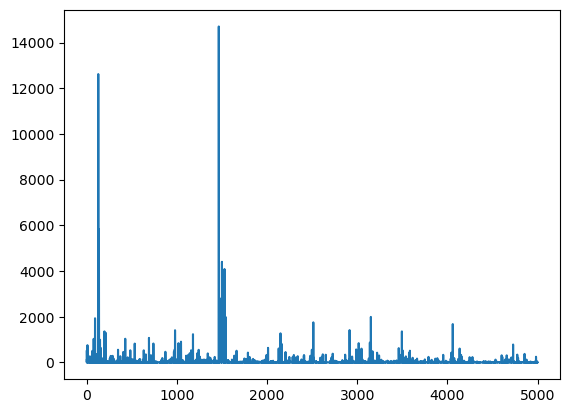

In [20]:
#hyperparameters:
loss_array =[]
days = 100 #control number of days available to the neural network

batch_size = 100 #in huge datasets it is customary to use batch size and updating parameters each batch until it covers the whole 
#dataset each epoch. It is also customary to use powers of 2 for the batch size.

learning_rate = 0.001

n_epoch = 5000 #an epoch ends when the whole training set is covered.

input_size = days*4 #I hate tensors

dimensions = {"L0": input_size, "L1": 50, "L2": 10, "L3":10, "L4":1} #number of nodes in each layer, L4 is the output. 10 IS FIXED
class NeuralNetwork(nn.Module):
    def __init__(self, dimensions):
        super(NeuralNetwork, self).__init__()
        self.L1 = nn.Linear(dimensions['L0'], dimensions['L1'])
        self.relu = nn.ReLU()
        self.L2 = nn.Linear(dimensions['L1'], dimensions['L2'])
        self.L3 = nn.Linear(dimensions['L2'], dimensions['L3'])
        self.L4 = nn.Linear(dimensions['L3'], dimensions['L4'])
    def forward(self, x): #x is the input
        #3 layers, each with relu except the last layer.
        x = self.L1(x)
        x = self.relu(x)
        x = self.L2(x)
        x = self.relu(x)
        x = self.L3(x)
        x= self.relu(x)
        y_predict = self.L4(x)
        return y_predict
model = NeuralNetwork(dimensions)

lossf = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(n_epoch):

    stock_vector, next_day_row = stock_vector_generator(data,days)
    stock_tensor = torch.from_numpy(stock_vector).float().T  #transpose because pytorch is shit
    actual = torch.from_numpy(np.array([float(next_day_row[1][1:])])).float()
    
    y_predict = model(stock_tensor) #forward prop
    y_predict = y_predict.view(1)    
    loss = lossf(y_predict, actual)
    loss_array.append(loss)
    loss.backward() #backprop
        
    optimizer.step() #update parameters
    optimizer.zero_grad() #resets the gradients
    if epoch % 10 == 0:
        print(f'At {epoch} step, loss is {loss}')
with torch.no_grad():
    
    plt.plot(np.linspace(0,n_epoch-1,num=n_epoch), loss_array)
    

Predicted on 06/23/2017 : 
3.9821439
Actual was: 
3.8458
3.545267016921511%
previous price: 3.9593
Directions disagree


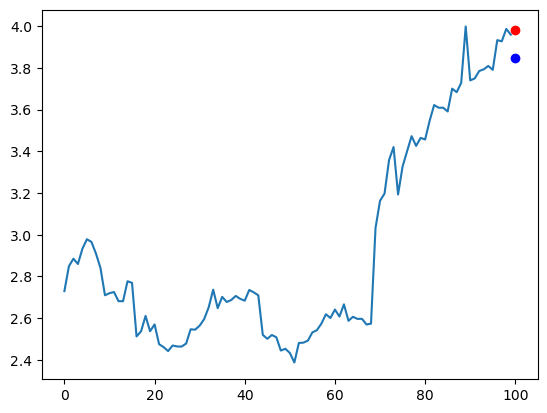

In [33]:
with torch.no_grad():
    stock_vector, next_day_row = stock_vector_generator(data,days)
    stock_tensor = torch.from_numpy(stock_vector).float().T 
    predicted = model(stock_tensor)
    predicted = predicted.numpy()[0][0]
    test_actual = float(next_day_row[1][1:])
    day = next_day_row[0]
    print('Predicted on ' + day + ' : ')
    print(predicted)
    print('Actual was: ')
    print(test_actual)
    diff = 100*((test_actual - predicted)**2)**0.5/test_actual 
    print(str(diff) + '%')
    prev_price = stock_vector[0][0]
    print('previous price: ' + str(prev_price))
    if prev_price > test_actual:
        if prev_price > predicted:
            print('Price will decrease as predicted')
        else:
            print('Directions disagree')
    else:
        if prev_price < predicted:
            print('Price will increase as predicted')
        else:
            print('Directions disagree')
    stock_vector = stock_vector.reshape(days,4)
    stock_vector = stock_vector[:,0]
    plt.plot(np.linspace(0,days-1,num=days),  stock_vector[::-1])
    plt.plot(days,predicted, 'ro', label = 'predicted')
    plt.plot(days,test_actual, 'bo')
